In [1]:
from mapbuilder import MapBuilder
from invprojection import  RBFinv, Pinv_ilamp, NNinv_torch
from sklearn.preprocessing import maxabs_scale, MinMaxScaler
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE, MDS
from sklearn.linear_model import LogisticRegression
from umap import UMAP
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from time import time


/home/peyote/workspace/map_builder/mapbuilder/tools.py:66: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
/home/peyote/workspace/map_builder/mapbuilder/tools.py:140: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
2024-11-11 23:48:25.176079: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical resul

In [2]:
# X, y = make_blobs(n_samples=800, centers=4, n_features=10, random_state=42)
# X = maxabs_scale(X)
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
X = np.array(X)
y = np.array(y)
X = X.astype('float32') / 255.
y = y.astype('int')
X, _, y, _ = train_test_split(X, y, train_size=3000, test_size=2000, random_state=420)
# clf = LogisticRegression()
# clf.fit(X, y)

/home/peyote/.conda/envs/tf3.11/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


device:  cuda:0
Epoch 1/150, Loss: 0.10426697
Epoch 2/150, Loss: 0.06476166
Epoch 3/150, Loss: 0.06040811
Epoch 4/150, Loss: 0.05598047
Epoch 5/150, Loss: 0.05239556
Epoch 6/150, Loss: 0.04966969
Epoch 7/150, Loss: 0.04747797
Epoch 8/150, Loss: 0.04592851
Epoch 9/150, Loss: 0.04465943
Epoch 10/150, Loss: 0.04350741
Epoch 11/150, Loss: 0.04254291
Epoch 12/150, Loss: 0.04176812
Epoch 13/150, Loss: 0.04117068
Epoch 14/150, Loss: 0.04066571
Epoch 15/150, Loss: 0.04024390
Epoch 16/150, Loss: 0.03988360
Epoch 17/150, Loss: 0.03955552
Epoch 18/150, Loss: 0.03927809
Epoch 19/150, Loss: 0.03902942
Epoch 20/150, Loss: 0.03881408
Epoch 21/150, Loss: 0.03861933
Epoch 22/150, Loss: 0.03843731
Epoch 23/150, Loss: 0.03827667
Epoch 24/150, Loss: 0.03811946
Epoch 25/150, Loss: 0.03797241
Epoch 26/150, Loss: 0.03782864
Epoch 27/150, Loss: 0.03769871
Epoch 28/150, Loss: 0.03758020
Epoch 29/150, Loss: 0.03746787
Epoch 30/150, Loss: 0.03734753
Epoch 31/150, Loss: 0.03723281
Epoch 32/150, Loss: 0.03712843
E

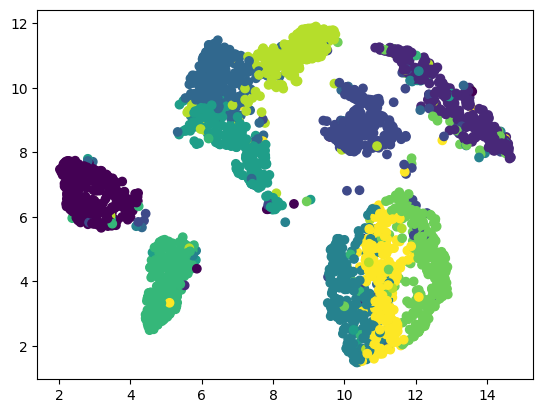

In [3]:
P = UMAP(n_components=2)

# X2D = TSNE(n_components=2).fit_transform(X)
X2D = P.fit_transform(X)
plt.scatter(X2D[:, 0], X2D[:, 1], c=y)
Pinv = NNinv_torch(dims=[128, 256, 512, 1024])
# Pinv = NNinv_torch()
# Pinv = RBFinv()
# Pinv = Pinv_ilamp()
Pinv.fit(X2D, X)



In [4]:
builder = MapBuilder(Pinv, None, X2d=X2D, X=X, y=y, scaling=0.9, P=P)

n_classes: 10
150


Loss: 1.5112: 100%|██████████| 150/150 [00:02<00:00, 51.20it/s]


In [5]:
grid_list = range(100, 600, 100)

time_dummy = []
time_fast = []

content = 'dist_map'



    

In [6]:
for grid in grid_list:
    print(f'grid size {grid}')
    t0 = time()
    builder.get_map(content=content, resolution=grid, fast_strategy=True)
    t1 = time()
    time_fast.append(t1-t0)

grid size 100
relace the label with the dist_map


/home/peyote/workspace/map_builder/mapbuilder/deepfool_neigbor.py:155: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  orig_classes = T.tensor(labels, device=input_batch.device, dtype=T.long)


grid size 200
relace the label with the dist_map


/home/peyote/workspace/map_builder/mapbuilder/deepfool_neigbor.py:155: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  orig_classes = T.tensor(labels, device=input_batch.device, dtype=T.long)


grid size 300
relace the label with the dist_map


/home/peyote/workspace/map_builder/mapbuilder/deepfool_neigbor.py:155: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  orig_classes = T.tensor(labels, device=input_batch.device, dtype=T.long)


grid size 400
relace the label with the dist_map


/home/peyote/workspace/map_builder/mapbuilder/deepfool_neigbor.py:155: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  orig_classes = T.tensor(labels, device=input_batch.device, dtype=T.long)


grid size 500
relace the label with the dist_map


/home/peyote/workspace/map_builder/mapbuilder/deepfool_neigbor.py:155: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  orig_classes = T.tensor(labels, device=input_batch.device, dtype=T.long)


In [7]:
for grid in grid_list:
    print(f'grid size {grid}')
    t0 = time()
    builder.get_map(content=content, resolution=grid, fast_strategy=False)
    t1 = time()
    time_dummy.append(t1-t0)

grid size 100
grid size 200
grid size 300
grid size 400
grid size 500


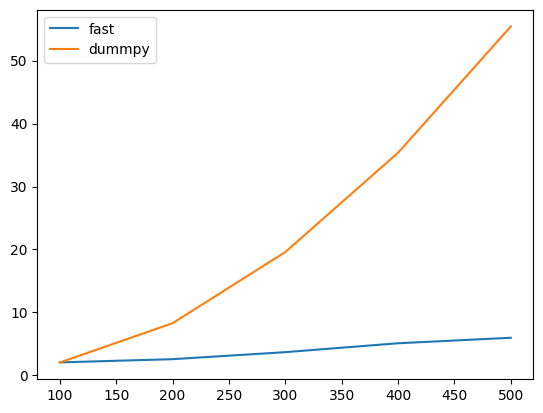

In [8]:
fig, ax = plt.subplots()

ax.plot(grid_list, time_fast, label='fast')
ax.plot(grid_list, time_dummy, label='dummy')
ax.legend()
plt.show()
